<a href="https://colab.research.google.com/github/siddarth-mp/HEART_DISEASE_PREDICTION_ML/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA on patient's readmission rate to hospital dataset : 
 

##Content : 
The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1) It is an inpatient encounter (a hospital admission).

2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

3) The length of stay was at least 1 day and at most 14 days.

4) Laboratory tests were performed during the encounter.

5) Medications were administered during the encounter

##Aim : 
It is important to know if a patient will be readmitted in some hospital. The reason is that we can change the treatment, in order to avoid a readmission.

In this dataset, we have 3 different outputs:

1) No readmission;

2) A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);

3) A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient

Importing necessary libraries :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import random


##read dataset (in .csv format) : 

In [3]:
df = pd.read_csv('/content/diabetic_data.csv')


##Dataset Description :
Encounter ID: Unique identifier of an encounter

Patient number: Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight Weight in pounds

Admission type Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital Integer number of days between admission and discharge

Payer code Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures Number of lab tests performed during the encounter

Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications Number of distinct generic names administered during the encounter

Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
Readmitted Days to inpatient readmission.

 Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [ ]:
df.head(n = 10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

##Check size of dataset : 

In [ ]:
df.shape


(101766, 50)

##Create a list with all possible occurences of NA values :

In [5]:
missing_values = ["?", "n/a", "na", "NA", " ", "--", "N"]


In [6]:
df = pd.read_csv('/content/diabetic_data.csv', na_values = missing_values)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print("\n")
print(" Number of Rows : ", len(df.axes[0]))
print(" Number of Columns : ", len(df.axes[1]))



 Number of Rows :  66347
 Number of Columns :  50


##Find missing values column wise :

In [7]:
print(" Missing Values in each Column : \n")
print(df.isnull().sum())
print(" \n\nTotal Number of Missing Values in Dataset is : ", df.isnull().sum().sum())

 Missing Values in each Column : 

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride  

In [ ]:
df['race']

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

deleting weight column which has all null values , drop na values if any in diag1, Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values

In [8]:
df['race'].fillna("AfricanAmerican", inplace=True) # as african race is very low fill na values with this value to balance the data
df['payer_code'].fillna("MC", inplace=True) 
df['medical_specialty'].fillna("other", inplace=True)
del df['weight']
df.dropna(subset=['diag_1'], inplace=True)
df.dropna(subset=['diag_2'], inplace=True)
df.dropna(subset=['diag_3'], inplace=True)


In [ ]:
print("\n\n")
print(df)
print("\n\n")




       encounter_id  patient_nbr             race  gender       age  \
1            149190     55629189        Caucasian  Female   [10-20)   
2             64410     86047875  AfricanAmerican  Female   [20-30)   
3            500364     82442376        Caucasian    Male   [30-40)   
4             16680     42519267        Caucasian    Male   [40-50)   
5             35754     82637451        Caucasian    Male   [50-60)   
...             ...          ...              ...     ...       ...   
66341     185270436     94334751         Hispanic  Female   [70-80)   
66342     185286408     24260805  AfricanAmerican    Male   [20-30)   
66343     185292312     84705966        Caucasian  Female  [90-100)   
66344     185294088     41227281        Caucasian    Male   [70-80)   
66345     185296590    111887577        Caucasian    Male   [60-70)   

       admission_type_id  discharge_disposition_id  admission_source_id  \
1                    1.0                       1.0                  7

In [9]:
outliers = []
def check_outliers(list_data, col):
   actual_data = list_data
   outlier_for_col = []
   data = np.sort(list_data)
   q1 = np.percentile(data, 25, interpolation = 'midpoint')
   q2 = np.percentile(data, 50, interpolation = 'midpoint')
   q3 = np.percentile(data, 75, interpolation = 'midpoint')
   iqr = q3 - q1
   low_limit = q1 - (1.5*iqr)
   up_limit = q3 + (1.5*iqr)
 
   for x,ind in zip(actual_data,df.index):
    if ((x> up_limit) or (x<low_limit)):
         outliers.append(x)
         outlier_for_col.append(x)
         df.drop(ind, inplace=True)
   print(" Number of Outliers in ",col," column is ",len(outlier_for_col), " with min = ",min(list_data)," and max = ",max(list_data))
   print("\n---------------------------------------------")
   outlier_for_col.clear()

In [10]:
def check_outliers_typ(list_data,list_cond,col):
    outlier_for_col = []   
    for i,ind in zip(list_data,df.index):
       if (i not in list_cond):
          outliers.append(i)
          outlier_for_col.append(i)
          df.drop(ind, inplace=True)   
    print(" Number of Outliers in ",col," column is ",len(outlier_for_col), " with min = ",min(list_data)," and max = ",max(list_data))
    print("\n---------------------------------------------")
    outlier_for_col.clear()

In [11]:
check_outliers_typ(df['admission_type_id'],range(1,9),'admission_type_id')
check_outliers_typ(df['discharge_disposition_id'],range(1,30),'discharge_disposition_id')
check_outliers_typ(df['admission_source_id'],range(1,27),'admission_source_id')

 Number of Outliers in  admission_type_id  column is  0  with min =  1  and max =  8

---------------------------------------------
 Number of Outliers in  discharge_disposition_id  column is  0  with min =  1  and max =  28

---------------------------------------------
 Number of Outliers in  admission_source_id  column is  0  with min =  1  and max =  25

---------------------------------------------


In [12]:
for i in range(8,49):
   if (df.dtypes[df.columns[i]] == np.int64):
      check_outliers(df[df.columns[i]], df.columns[i])


KeyboardInterrupt: ignored

In [13]:

total_no_of_outliers = len(outliers)
print(" \n\nTotal number of outliers in dataset : ", total_no_of_outliers)

print("\n")
print(" Number of rows and columns after removing outliers")
print("  Number of Rows : ", len(df.axes[0]))
print("  Number of Columns : ", len(df.axes[1]))

print("\n")
print(" Min and Max values of each column after removing outliers: \n\n")

 

Total number of outliers in dataset :  447


 Number of rows and columns after removing outliers
  Number of Rows :  99798
  Number of Columns :  49


 Min and Max values of each column after removing outliers: 




In [17]:
for i in df.columns:
   if (df.dtypes[i] == np.int64):
       print( "Min and max value of ",i," columns are : ",min(df[i])," and ",max(df[i]))

inc_list = []

Min and max value of  encounter_id  columns are :  15738  and  443867222
Min and max value of  patient_nbr  columns are :  135  and  189502619
Min and max value of  admission_type_id  columns are :  1  and  8
Min and max value of  discharge_disposition_id  columns are :  1  and  28
Min and max value of  admission_source_id  columns are :  1  and  25
Min and max value of  time_in_hospital  columns are :  1  and  14
Min and max value of  num_lab_procedures  columns are :  1  and  132
Min and max value of  num_procedures  columns are :  0  and  6
Min and max value of  num_medications  columns are :  1  and  81
Min and max value of  number_outpatient  columns are :  0  and  42
Min and max value of  number_emergency  columns are :  0  and  76
Min and max value of  number_inpatient  columns are :  0  and  21
Min and max value of  number_diagnoses  columns are :  3  and  16


In [14]:
def check_inconsistent(list_data, list_cond,col):
    count_inc = 0
    for i,ind in zip(list_data,df.index):
       if (i not in list_cond):
          df.drop(ind, inplace=True)
          count_inc += 1
    print(" \n Number of inconsistent values in ",col," column is :",count_inc)
    inc_list.append(count_inc)

In [15]:
def check(list_data,col):
   count_inc = 0
   for i,ind in zip(list_data,df.index):
      if (i < 0 or isinstance(i, float)):
         df.drop(ind, inplace=True)
         count_inc += 1
   print(" \n Number of inconsistent values in ",col," column is :",count_inc)
   inc_list.append(count_inc)

def check_diag(list_data,col):
   count_diaginc = 0
   for i,ind in zip(list_data,df.index):
      if (i.isalnum()): 
         continue
      elif (i.find(".") != -1 or i.isdigit()):
         continue
      else:
         df.drop(ind, inplace=True)
         count_diaginc += 1
   print(" \n Number of inconsistent values in ",col," column is :",count_diaginc)
   inc_list.append(count_diaginc)

In [18]:
check(df['encounter_id'],'encounter_id')
check(df['patient_nbr'],'patient_nbr')
check_inconsistent(df['gender'],["Female", "female", "Male", "male"],'gender')
check_inconsistent(df['age'],["[0-10)","[10-20)","[20-30)","[30-40)","[40-50)","[50-60)","[60-70)","[70-80)","[80-90)","[90-100)"],'age')
check_inconsistent(df['admission_type_id'],range(1,10),'admission_type_id')
check_inconsistent(df['discharge_disposition_id'],range(1,30),'discharge_disposition_id')
check_inconsistent(df['admission_source_id'],range(1,27),'admission_source_id')


 
 Number of inconsistent values in  encounter_id  column is : 0
 
 Number of inconsistent values in  patient_nbr  column is : 0
 
 Number of inconsistent values in  gender  column is : 3
 
 Number of inconsistent values in  age  column is : 0
 
 Number of inconsistent values in  admission_type_id  column is : 0
 
 Number of inconsistent values in  discharge_disposition_id  column is : 0
 
 Number of inconsistent values in  admission_source_id  column is : 0


In [19]:
check(df['time_in_hospital'],'time_in_hospital')
check(df['number_inpatient'],'number_inpatient')
check_diag(df['diag_1'],'diag_1')
check_diag(df['diag_2'],'diag_2')
check_diag(df['diag_3'],'diag_3')
check(df['number_diagnoses'],'number_diagnoses')
check_inconsistent(df['max_glu_serum'],[">200",">300","None","none","Normal","normal","Norm","norm"],'max_glu_serum')
check_inconsistent(df['A1Cresult'],[">7",">8","None","Normal","none","normal","Norm","norm"],'A1Cresult')


 
 Number of inconsistent values in  time_in_hospital  column is : 0
 
 Number of inconsistent values in  number_inpatient  column is : 0
 
 Number of inconsistent values in  diag_1  column is : 0
 
 Number of inconsistent values in  diag_2  column is : 0
 
 Number of inconsistent values in  diag_3  column is : 0
 
 Number of inconsistent values in  number_diagnoses  column is : 0
 
 Number of inconsistent values in  max_glu_serum  column is : 0
 
 Number of inconsistent values in  A1Cresult  column is : 0


In [20]:
columns = list(df.axes[1])
for i in range(23,46):
    check_inconsistent(df[columns[i]],["No","Up","Down","Steady"],columns[i])

check_inconsistent(df['change'],["Ch","No","ch","change","no change"],'change')
check_inconsistent(df['diabetesMed'],["Yes","No","yes","no"],'diabetesMed')
check_inconsistent(df['readmitted'],["NO",">30","<30"],'readmitted')

 
 Number of inconsistent values in  metformin  column is : 0
 
 Number of inconsistent values in  repaglinide  column is : 0
 
 Number of inconsistent values in  nateglinide  column is : 0
 
 Number of inconsistent values in  chlorpropamide  column is : 0
 
 Number of inconsistent values in  glimepiride  column is : 0
 
 Number of inconsistent values in  acetohexamide  column is : 0
 
 Number of inconsistent values in  glipizide  column is : 0
 
 Number of inconsistent values in  glyburide  column is : 0
 
 Number of inconsistent values in  tolbutamide  column is : 0
 
 Number of inconsistent values in  pioglitazone  column is : 0
 
 Number of inconsistent values in  rosiglitazone  column is : 0
 
 Number of inconsistent values in  acarbose  column is : 0
 
 Number of inconsistent values in  miglitol  column is : 0
 
 Number of inconsistent values in  troglitazone  column is : 0
 
 Number of inconsistent values in  tolazamide  column is : 0
 
 Number of inconsistent values in  examide

In [21]:
total_no_of_inc = sum(inc_list)
print(" \n\nTotal number of inconsistent values in dataset : ", total_no_of_inc)



print("\n")
print(" Number of rows and columns after removing inconsistent values")
print(" Number of Rows : ", len(df.axes[0]))
print(" Number of Columns : ", len(df.axes[1]))

 

Total number of inconsistent values in dataset :  3


 Number of rows and columns after removing inconsistent values
 Number of Rows :  99795
 Number of Columns :  49


In [22]:
readm = ["<30",">30","NO"]
no_of_patients = [0,0,0]

for i in df['readmitted']:
   if (i == "<30"):
      no_of_patients[0] += 1
   elif (i == ">30"):
      no_of_patients[1] += 1
   else:
      no_of_patients[2] += 1

In [23]:
no_of_patients

[11198, 34991, 53606]

##Feature Engineering :

This is highly subjective part, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features. There are several approaches. We tried some

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization . The idea was to see which version gives us better results. 

In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs  which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. so that we could  possibly discover a relationship with number of changes irrespective of which drug was changed

In [14]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts() 

0    72729
1    25777
2     1291
3      107
4        5
Name: numchange, dtype: int64

Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [ ]:
df['readmitted'].value_counts()


0    88341
1    11116
Name: readmitted, dtype: int64

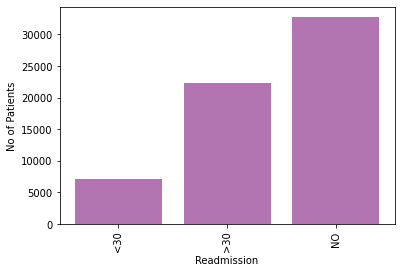

In [ ]:
y_pos = np.arange(len(readm))
plt.bar(y_pos,no_of_patients,color=(0.5,0.1,0.5,0.6))
plt.xlabel('Readmission')
plt.ylabel('No of Patients')
plt.xticks(y_pos,readm,rotation='vertical')
plt.show()

##Changing NO to 0 and <30,>30 to 1

In [ ]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

##Data Visualization :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facb4f00f90>,
      dtype=object)

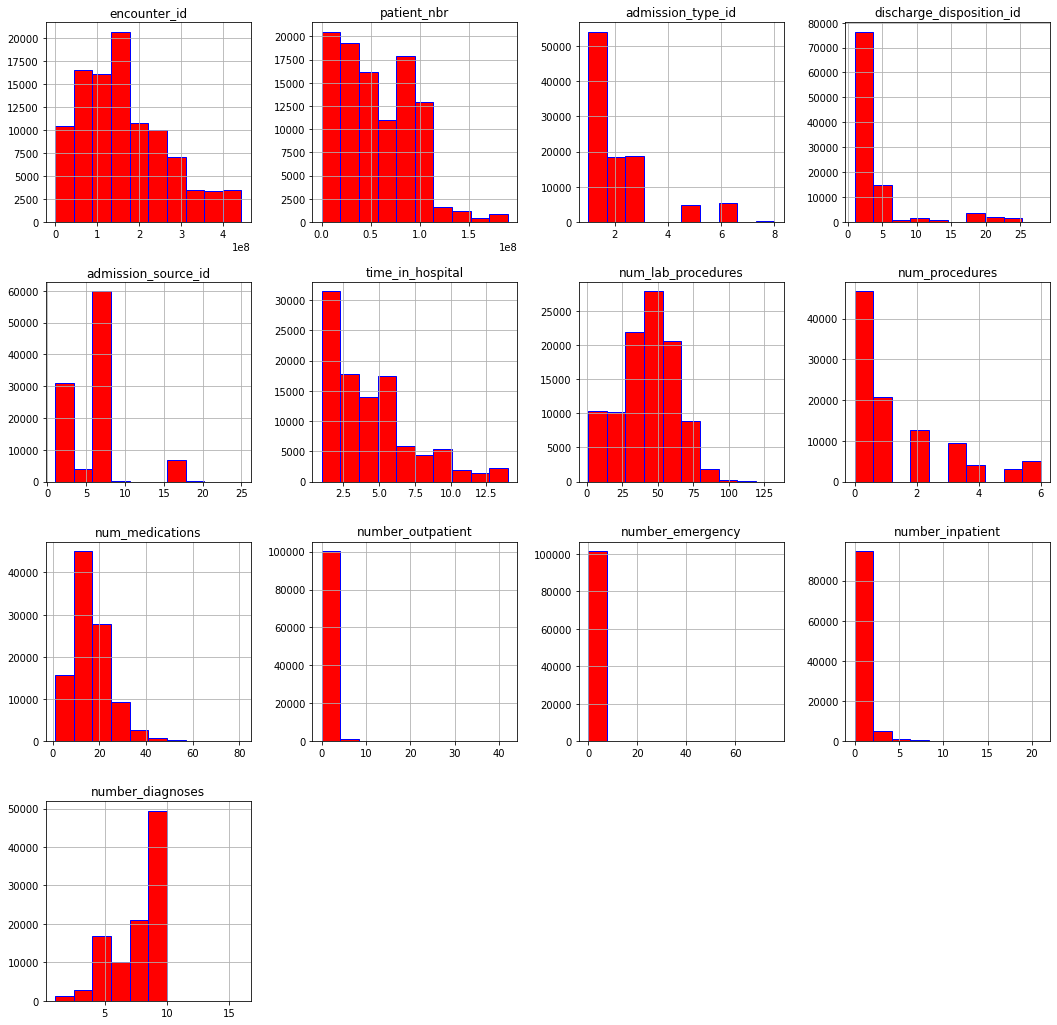

In [ ]:
df.hist(figsize=(18,18),facecolor='red',edgecolor='blue')  # face color is the color that will be displayed inside bins and edge colour is for bin borders

##Time in Hospital v/s Readmission :

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

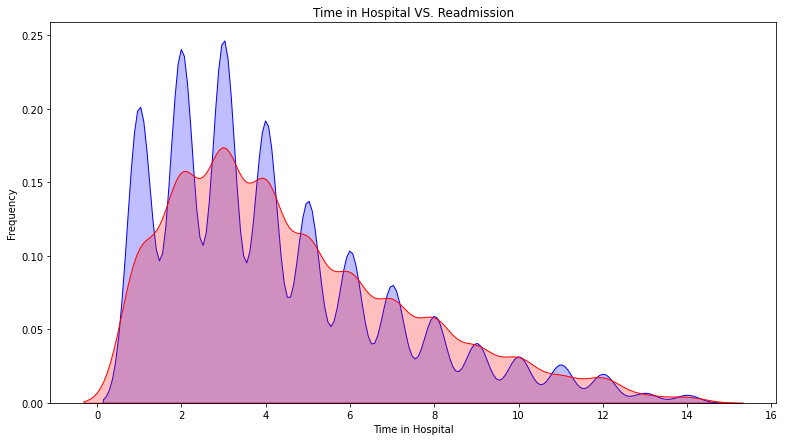

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

##Age v/s Readmission:

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

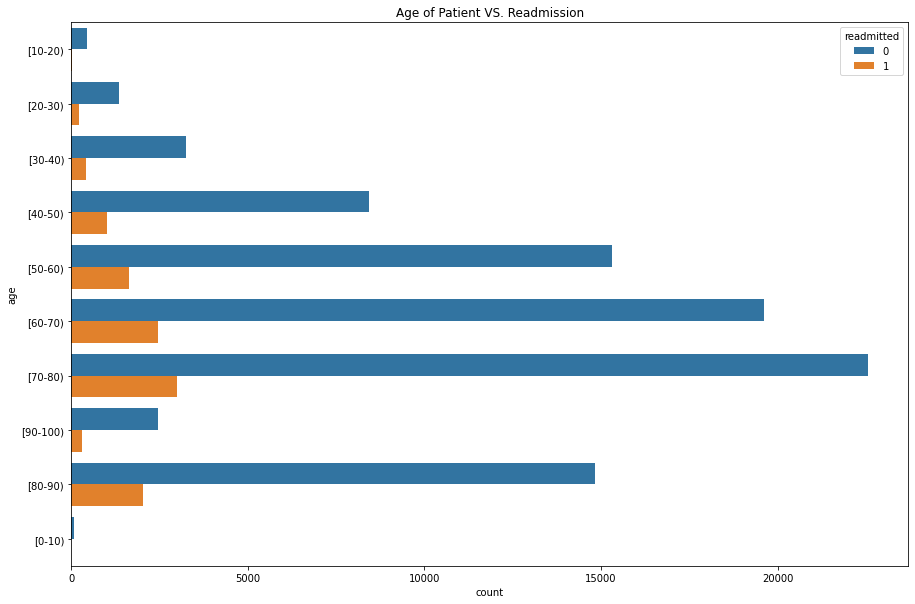

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

##Ethnicity v/s Readmission:

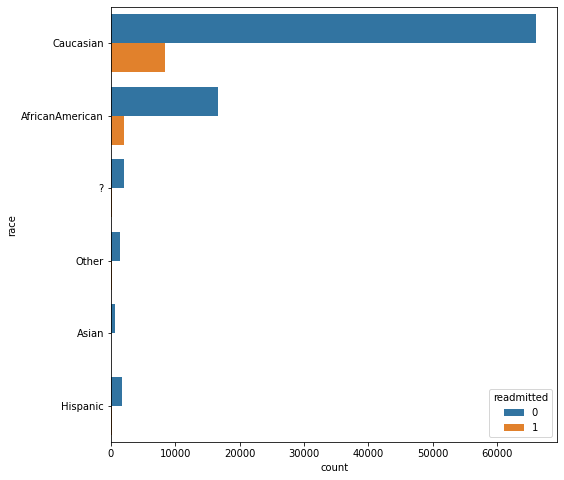

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

##Medication used v/s Readmission:

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

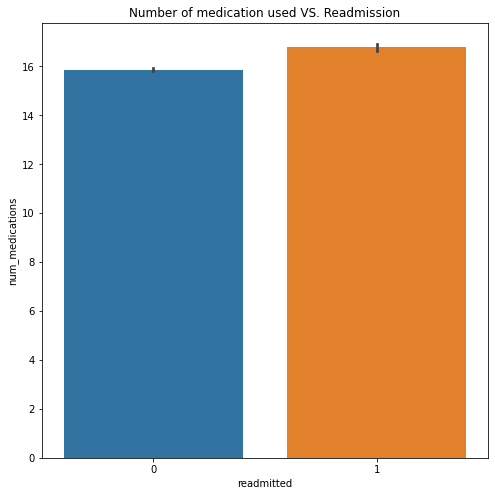

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

##Gender and Readmission :

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

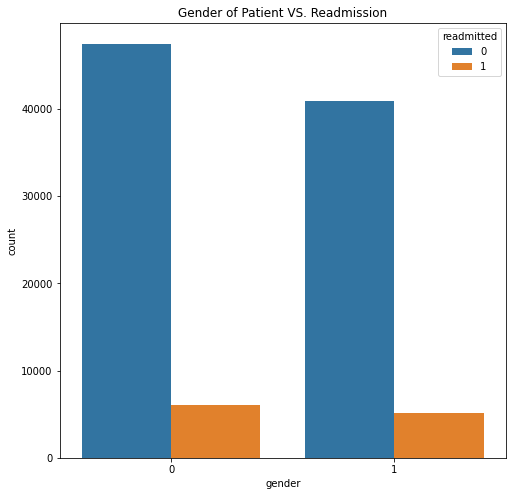

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

##Diabetes Medication prescribed and Readmission
Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
Values: “yes” : 1 “no” : 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

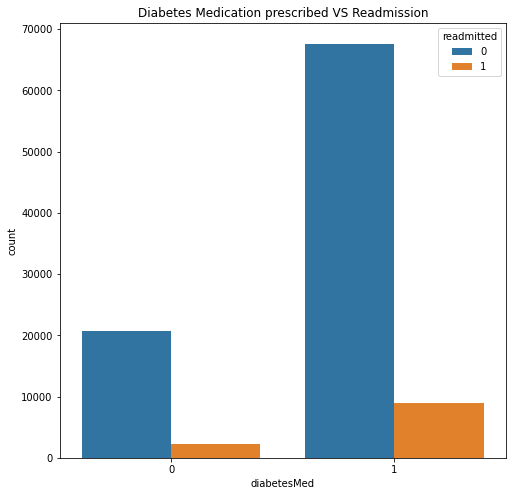

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

##Race
We have 5 different races value, these are;

Caucasian

AfricanAmerican

Hispanic

Asian

Other

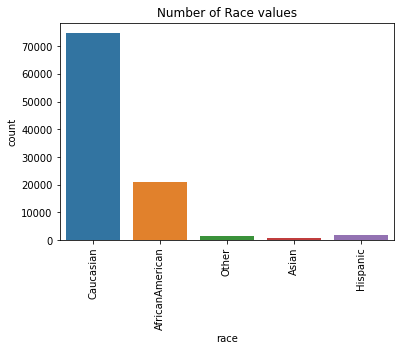

Proportion of Race
Caucasian          74.912571
AfricanAmerican    21.001052
Hispanic            1.981061
Other               1.481036
Asian               0.624280
Name: race, dtype: float64


In [56]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

As we see, there is Caucasians in 76 percent of all our data. And other other 24 percent is divided into African Americans, Hispanics, Asians and Others.
Here we decided to divide into 3 groups like Caucasian, African American and Other.

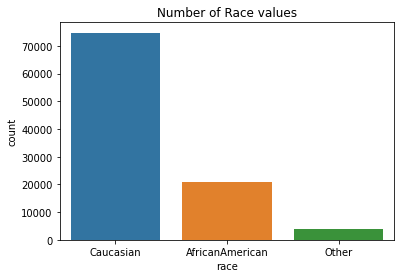

Proportion of Race After the Mapping
Caucasian          74.912571
AfricanAmerican    21.001052
Other               4.086377
Name: race, dtype: float64


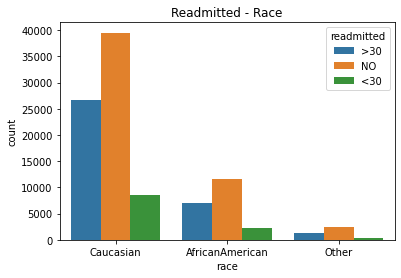

In [58]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
df.race = df.race.replace(mapped_race)

sns.countplot(x="race", data = df)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(df.race.value_counts(normalize= True)*100)

sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

Most of the patients are Caucasian, followed by African Americans.
Although the Other values are few than Caucasian, we see that the Readmitted Probability almost close to Caucasian.
Most of the patients are Caucasian, followed by African Americans.
Although the Other values are few than Caucasian, we see that the Readmitted Probability almost close to Caucasian.

##Gender :

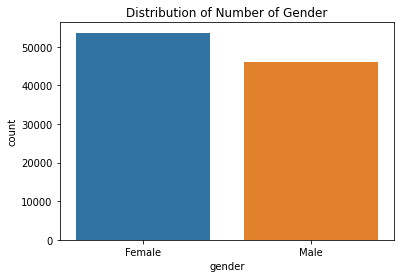

Proportions of Race Value
Female    0.537913
Male      0.462087
Name: gender, dtype: float64


In [60]:
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

When we looked up **Gender** values, there is only one entry for **Unknown/Invalid**. So we dropped them

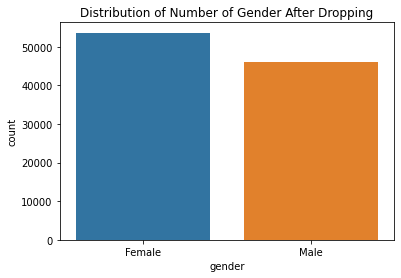

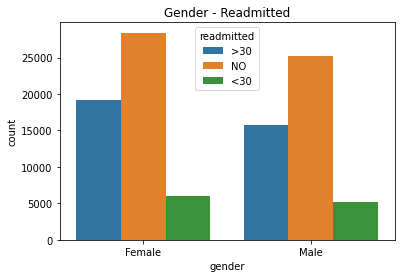

In [61]:
diabet = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

##We see a nearly equal distribution of Gender.
Also, we can state that Females are a little more prone than Males.

##Change of Medication and Readmission
Change = 1
No Change = 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

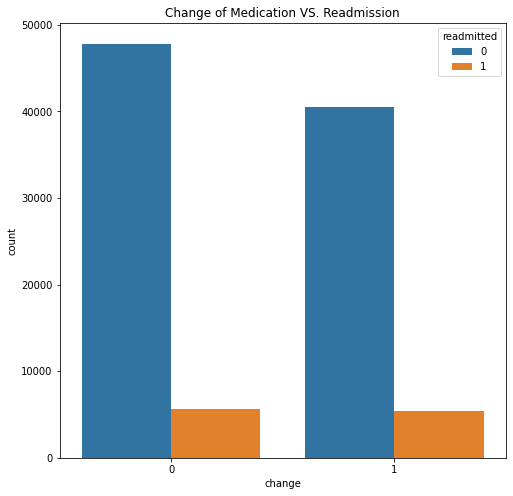

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

##Service Utilization and Readmission:

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

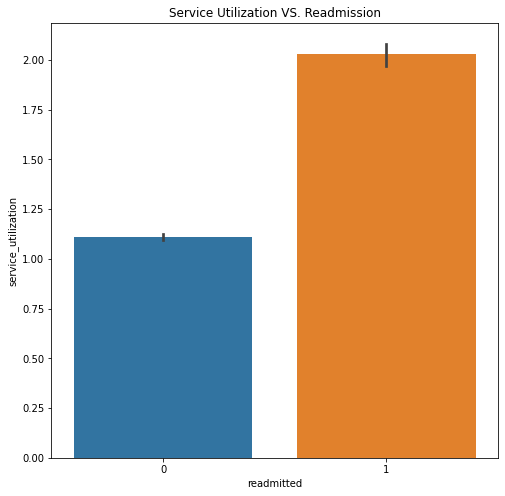

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

##Lab procedure,Readmission:

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

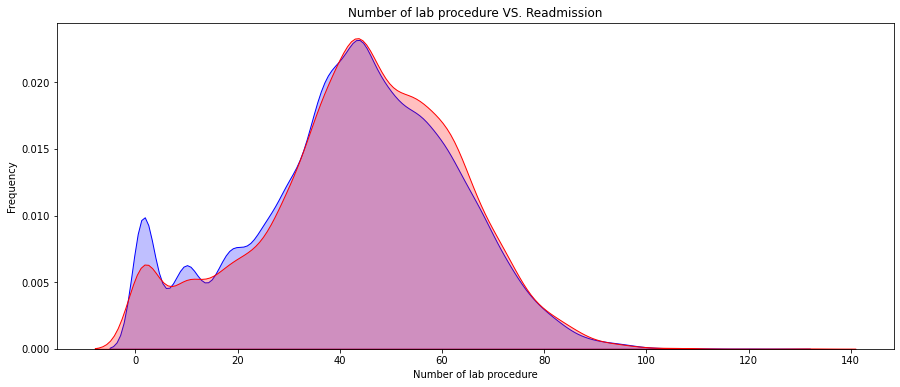

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

##Glucose serum test result and Readmission
Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

'>200' : 1 = indicates diabetes

'>300' : 1 = Indicates diabetes

'Norm' : 0 = Normal

'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

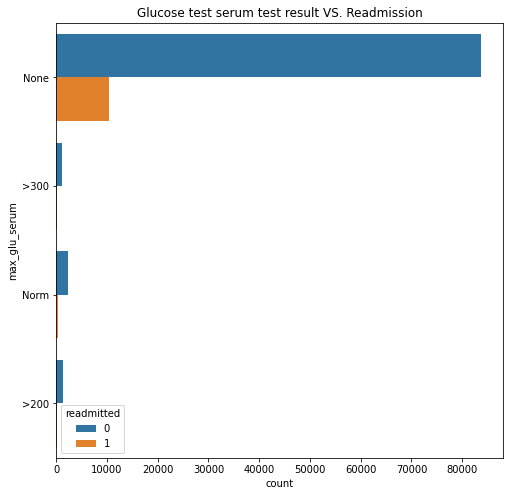

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

##Age :

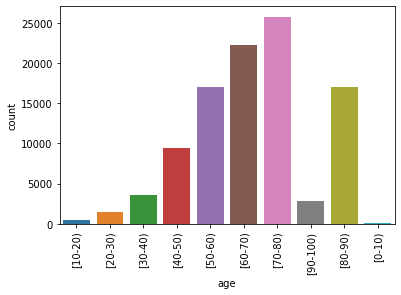

In [44]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

##Getting probability

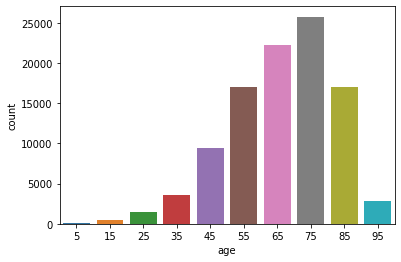

In [45]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
#plt.xticks(rotation = 90)
plt.show()

##Cleraly we can see that elderly people are affected most 

##Admission Type ID
Integer identifier corresponding to 9 distinct values;

Emergency : 1
Urgent : 2
Elective : 3
Newborn : 4
Not Available : 5
NULL : 6
Trauma Center : 7
Not Mapped : 8

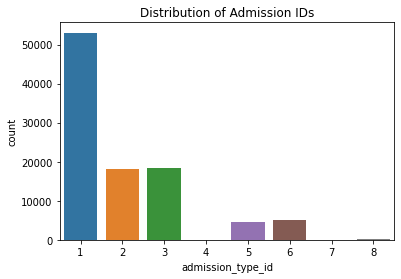

Distribution of ID's
1    53007
3    18487
2    18100
6     5150
5     4705
8      315
7       21
4       10
Name: admission_type_id, dtype: int64


In [49]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(df.admission_type_id.value_counts())

##Time in Hospital
Integer number of days between admission and discharge. Shortly it is "treatment time"

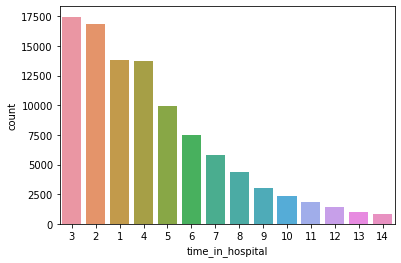

3     17444
2     16808
1     13791
4     13744
5      9899
6      7490
7      5831
8      4369
9      2989
10     2338
11     1847
12     1445
13      969
14      831
Name: time_in_hospital, dtype: int64


In [50]:
sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

print(df.time_in_hospital.value_counts())

##A1c test result
Indicates the range of the result or if the test was not taken.
Values:

“>8” if the result was greater than 8%,

“>7” if the result was greater than 7% but less than 8%, “normal”

if the result was less than 7%, and “none” if not measured.

We decided use the A1c test result like as follows:

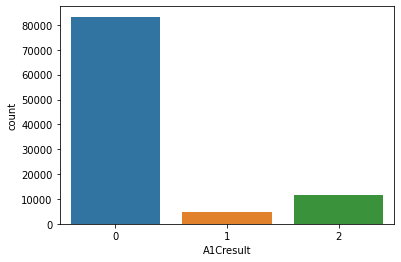

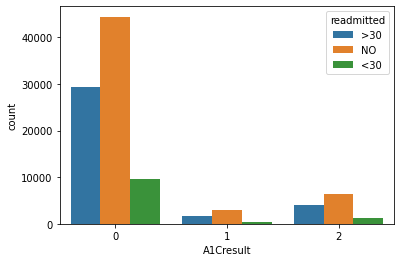

0    83308
2    11577
1     4910
Name: A1Cresult, dtype: int64


In [54]:
df["A1Cresult"] = df["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = df)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = df)
plt.show()

print(df.A1Cresult.value_counts())

##Grouping Factors of cause together:

In [27]:
group_name = ["Circulatory","Respiratory","Digestive","Diabetes","Injury","Musculoskeletal","Genitourinary,","Neoplasms","Other"]
no_of_enc = [0,0,0,0,0,0,0,0,0]
for i in df['diag_1']:
    if (i.isnumeric()):
       a = int(i)
       if(a in range(390,460) or a==785):
          no_of_enc[0] += 1
       elif (a in range(460,520) or a==786):
          no_of_enc[1] += 1
       elif (a in range(520,580) or a==787):
          no_of_enc[2] += 1
       elif (a in range(800,1000)):
          no_of_enc[4] += 1
       elif (a in range(710,740)):
          no_of_enc[5] += 1
       elif (a in range(580,630) or a==788):
          no_of_enc[6] += 1
       elif (a in range(140,240)):
          no_of_enc[7] += 1
       else:
          no_of_enc[8] += 1
    elif (i[0]=='2' and i[1]=='5' and i[2]=='0'):
       no_of_enc[3] += 1
    else:
       no_of_enc[8] += 1

In [33]:
print("Total entries in :")
for i in range(len(group_name)): 
    print(group_name[i])
    print(no_of_enc[i])


Total entries in :
Circulatory
30144
Respiratory
14276
Digestive
9333
Diabetes
7899
Injury
6805
Musculoskeletal
4848
Genitourinary,
5061
Neoplasms
3370
Other
18059


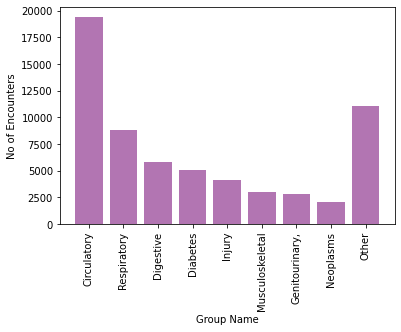

In [ ]:
y_pos = np.arange(len(group_name))
plt.bar(y_pos,no_of_enc,color=(0.5,0.1,0.5,0.6))
plt.xlabel('Group Name')
plt.ylabel('No of Encounters')
plt.xticks(y_pos,group_name,rotation='vertical')
plt.show()

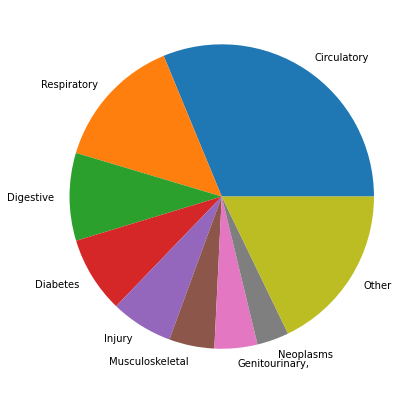

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.pie(no_of_enc, labels = group_name)
plt.show()

##Getting numerical columns

In [35]:
cor_list = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']

data = {
   'time_in_hospital': df['time_in_hospital'],
   'num_lab_procedures': df['num_lab_procedures'],
   'num_procedures': df['num_procedures'],
   'num_medications': df['num_medications'],
   'number_outpatient': df['number_outpatient'],
   'number_emergency': df['number_emergency'],
   'number_inpatient': df['number_inpatient']
}
df_new = pd.DataFrame(data,columns = cor_list)

In [38]:
df_new.columns


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient'],
      dtype='object')

In [ ]:
df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


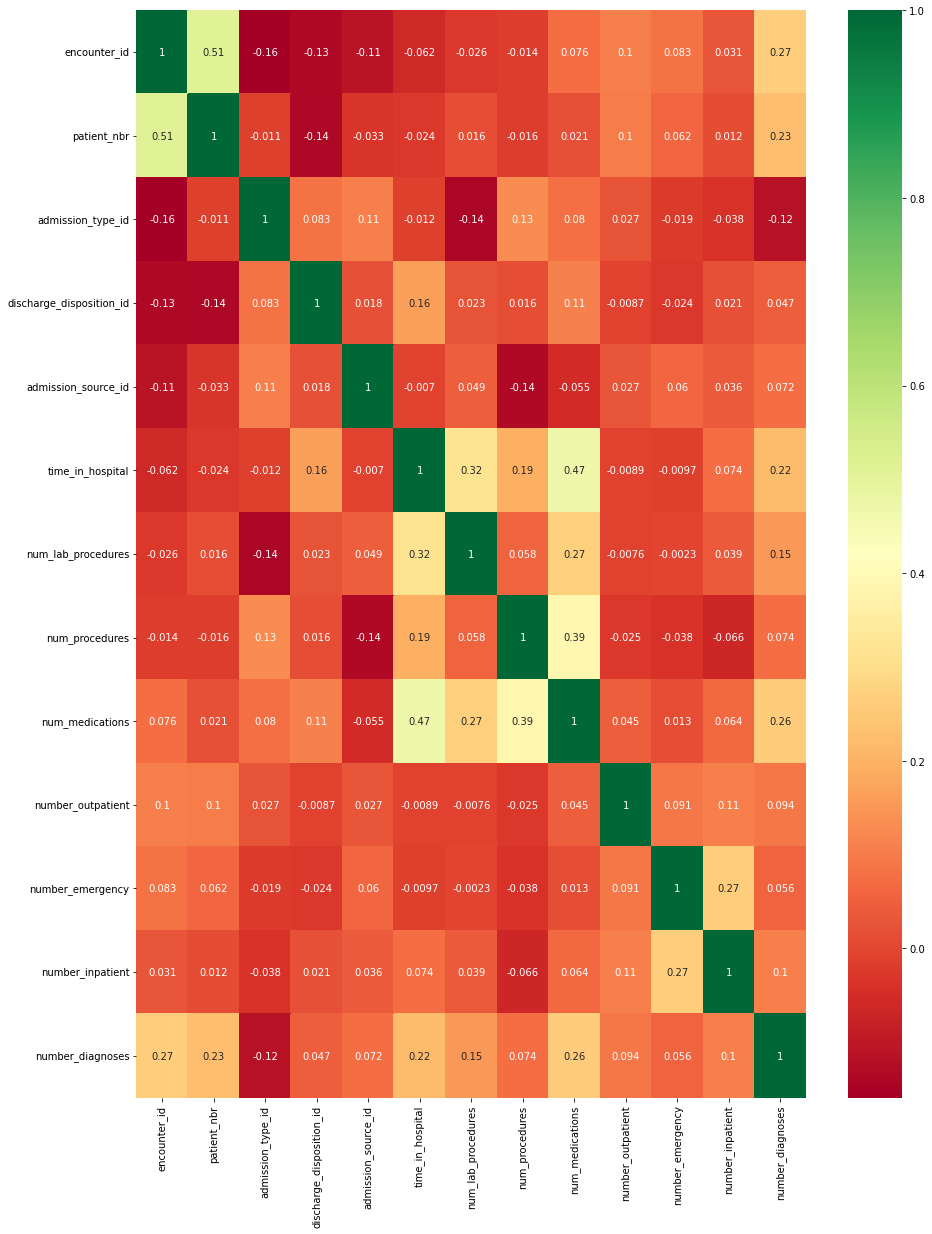

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



 Correlation Matrix is : 

                    time_in_hospital  num_lab_procedures  num_procedures  \
time_in_hospital            1.000000            0.276775        0.210810   
num_lab_procedures          0.276775            1.000000        0.081321   
num_procedures              0.210810            0.081321        1.000000   
num_medications             0.454283            0.237467        0.411872   
number_outpatient          -0.016145           -0.023189       -0.020451   
number_emergency           -0.015530           -0.023217       -0.038492   
number_inpatient            0.075489            0.041552       -0.062827   

                    num_medications  number_outpatient  number_emergency  \
time_in_hospital           0.454283          -0.016145         -0.015530   
num_lab_procedures         0.237467          -0.023189         -0.023217   
num_procedures             0.411872          -0.020451         -0.038492   
num_medications            1.000000           0.038901    

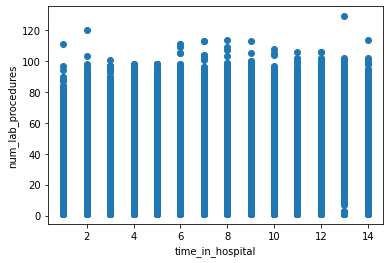

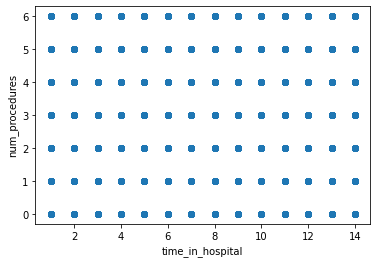

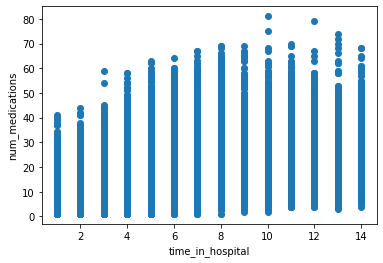

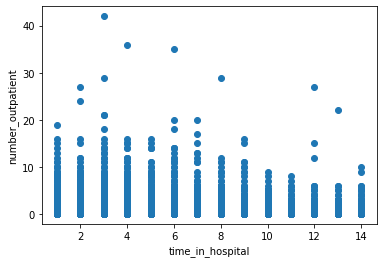

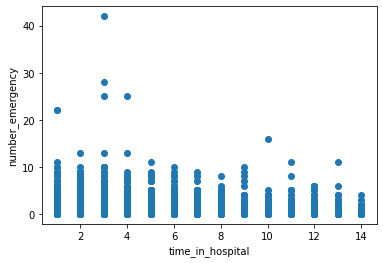

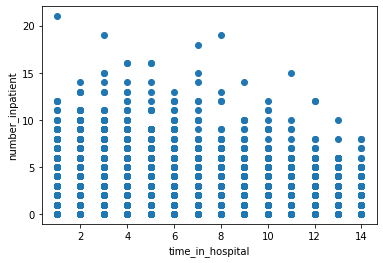

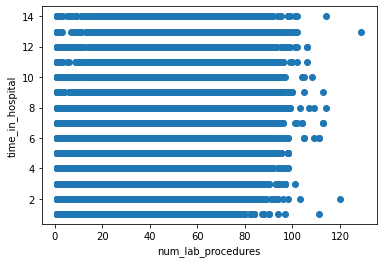

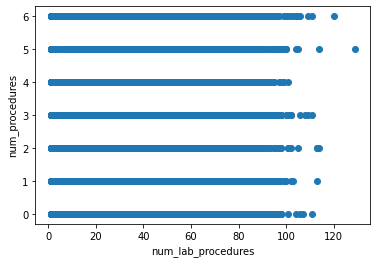

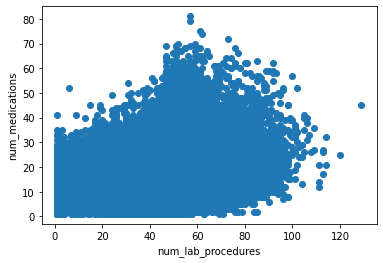

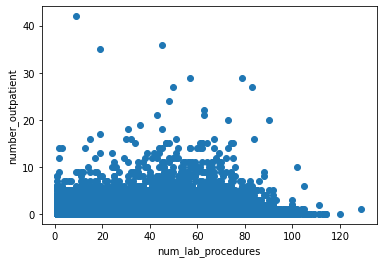

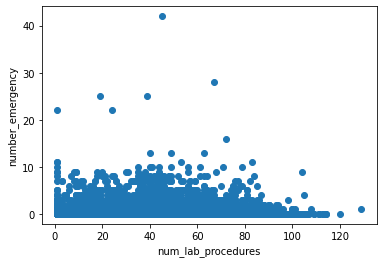

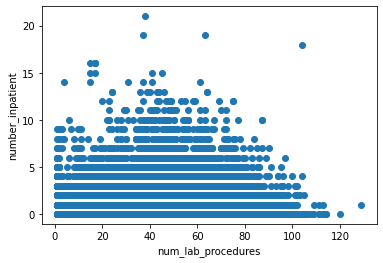

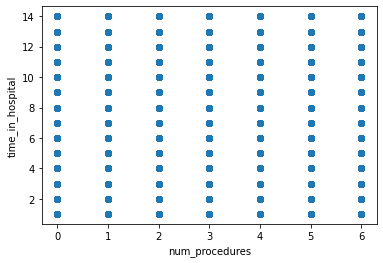

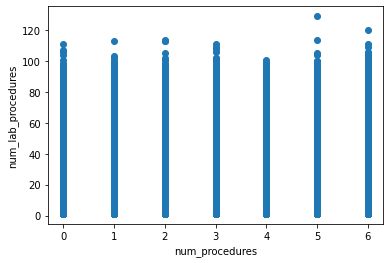

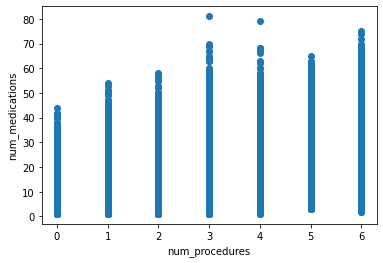

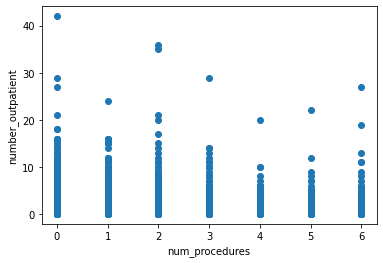

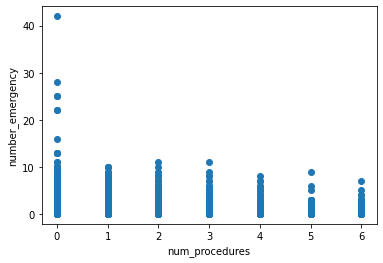

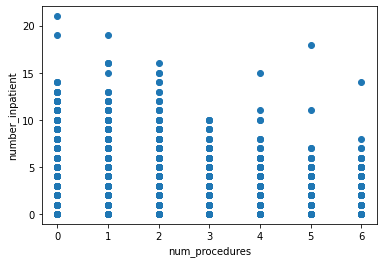

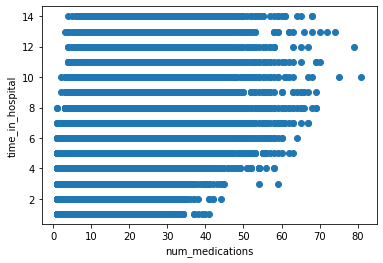

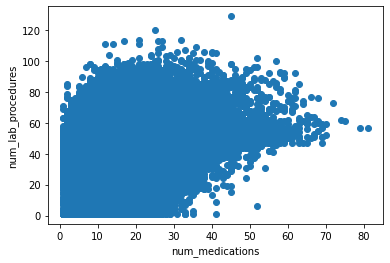

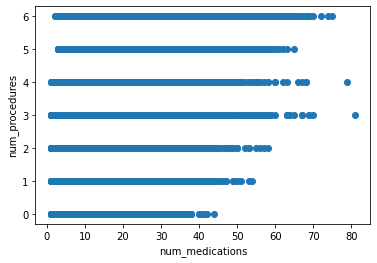

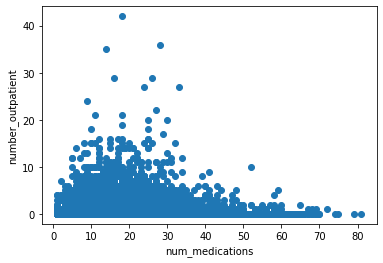

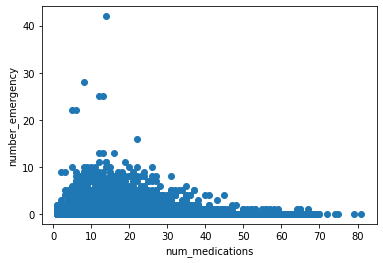

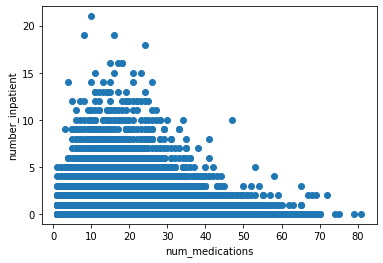

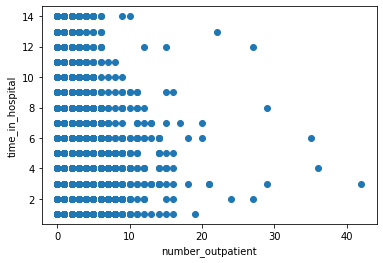

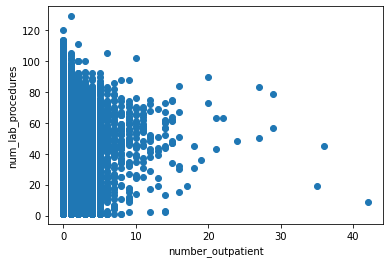

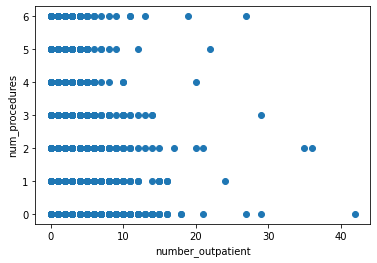

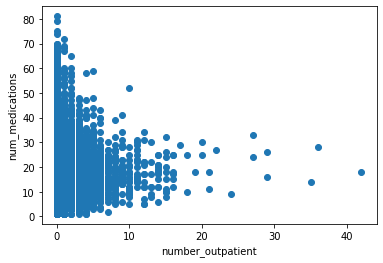

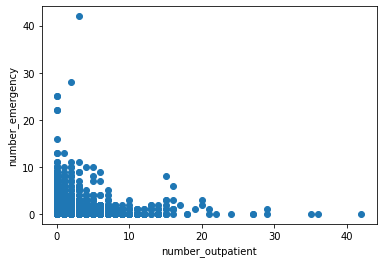

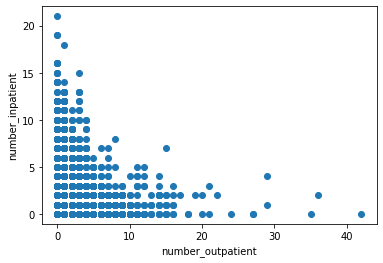

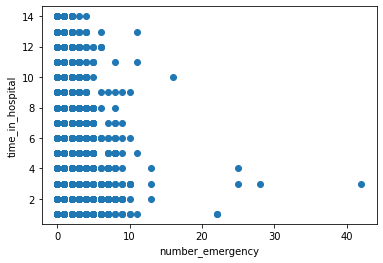

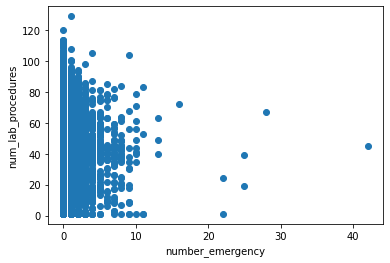

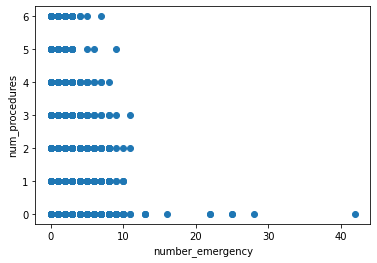

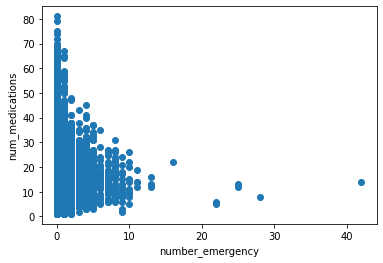

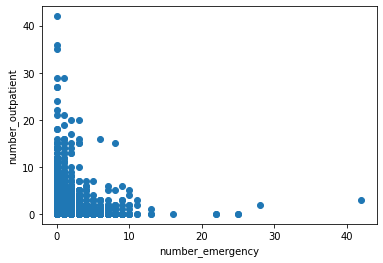

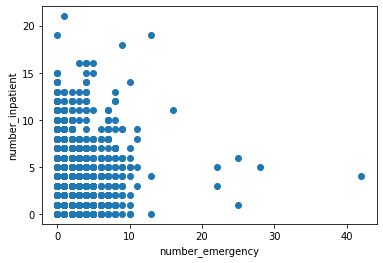

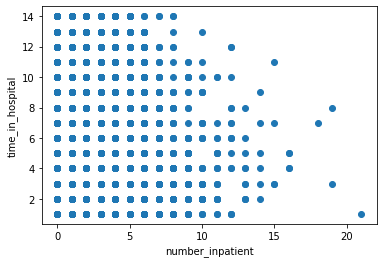

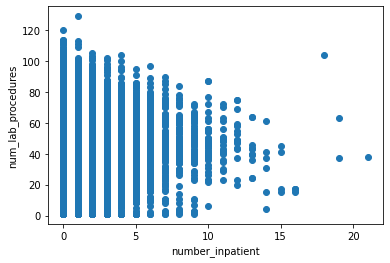

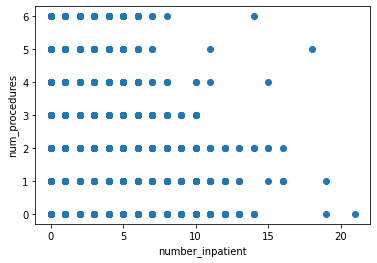

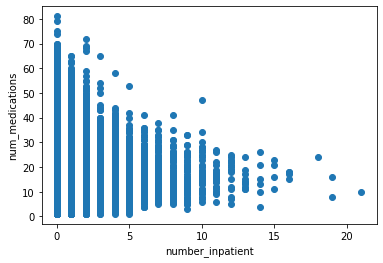

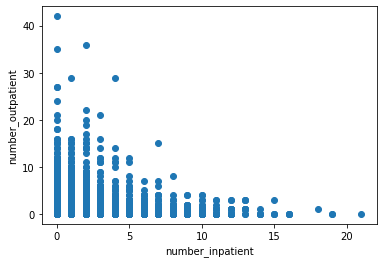

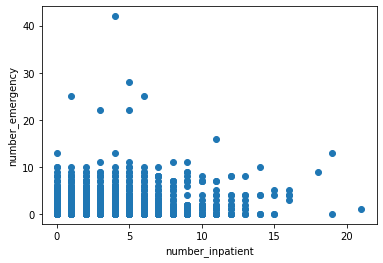

In [ ]:
corr_matrix = df_new.corr()

print("\n")
print(" Correlation Matrix is : \n")
print(corr_matrix)

def cor_plot(x,y):
   plt.scatter(df[x],df[y])
   plt.xlabel(x)
   plt.ylabel(y)
   plt.show(block=False)
   plt.pause(0.5)
   plt.close("all")

for i in cor_list:
   for j in cor_list:
      if (i != j):
         cor_plot(i,j)

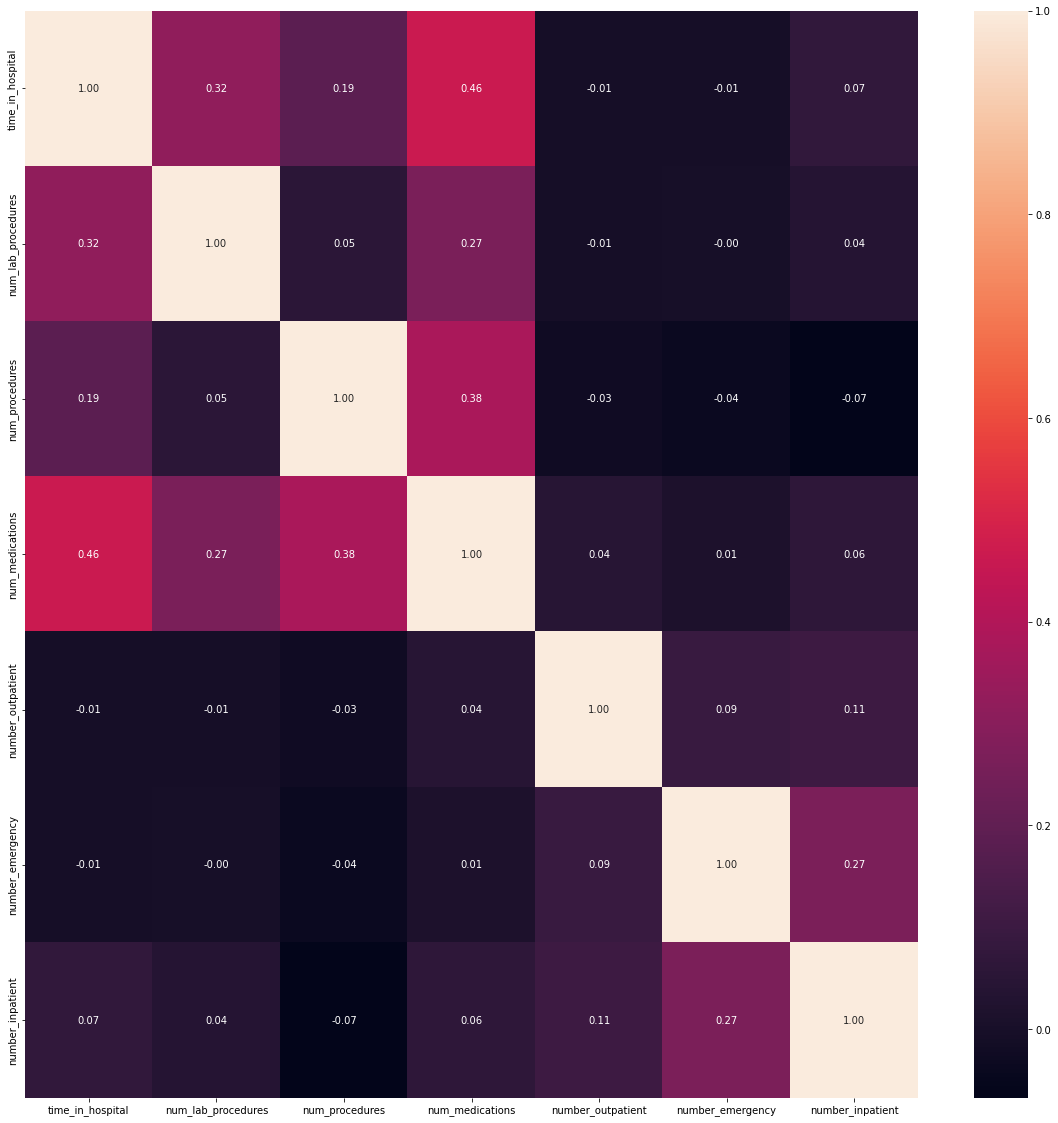

In [40]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_new.corr(), annot = True, fmt= '.2f')

In [41]:
readmitted = []

for i in df['readmitted']:
   if (i == ">30"):
      readmitted.append(1)
   elif (i == "<30"):
      readmitted.append(2)
   else:
      readmitted.append(3)

In [ ]:
for i in range(0,20):
   print(readmitted[i])
num_data = {
   'time_in_hospital': df['time_in_hospital'],
   'num_lab_procedures': df['num_lab_procedures'],
   'num_procedures': df['num_procedures'],
   'num_medications': df['num_medications'],
   'number_outpatient': df['number_outpatient'],
   'number_emergency': df['number_emergency'],
   'number_inpatient': df['number_inpatient'],
   'readmitted': readmitted
}

3
3
3
2
2
1
1
3
2
1
1
1
1
1
1
3
1
1
3
1


In [ ]:
df = pd.read_csv('/content/diabetic.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,...,No,No,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65509,443842136,181593374,Caucasian,Female,[70-80),1,1,7,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
65510,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
65511,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
65512,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


##Below type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
features = list(df.axes[1])[2:48]

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df[features])
diabetic_df_encoded = pd.DataFrame(data_encoded, columns=features)
#print(data_encoded)

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df['readmitted'])
diabetic_df_encoded['readmitted'] = target_encoded
encoder.inverse_transform(target_encoded)

diabetic_df_encoded

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2.0,0.0,1.0,0.0,0.0,6.0,2.0,6.0,71.0,58.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2.0,1.0,3.0,0.0,0.0,6.0,1.0,6.0,71.0,43.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,2.0,1.0,4.0,0.0,0.0,6.0,0.0,6.0,71.0,50.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,2.0,1.0,6.0,2.0,0.0,1.0,3.0,6.0,71.0,69.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,2.0,1.0,7.0,0.0,0.0,6.0,4.0,6.0,71.0,72.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65509,2.0,0.0,7.0,0.0,0.0,6.0,4.0,6.0,71.0,20.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
65510,0.0,1.0,7.0,0.0,2.0,6.0,2.0,6.0,71.0,50.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
65511,0.0,0.0,8.0,0.0,3.0,4.0,4.0,6.0,71.0,32.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
65512,2.0,0.0,8.0,1.0,2.0,6.0,9.0,6.0,61.0,44.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
